<a href="https://colab.research.google.com/github/hussain0048/Machine-Learning/blob/master/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter: 2- Linear Regression with one Variable**

**Import libraries**

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Load dataseet**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#path = os.getcwd() + '/content/drive/MyDrive/Courses /Data Science /Machine Learning/Theory /ML andrew/Dataset/ex1data1.txt'
data = pd.read_csv('/content/drive/MyDrive/Courses /Data Science /Machine Learning/Theory /ML andrew/Dataset/ex1data1.txt', header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [ ]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


<Axes: xlabel='Population', ylabel='Profit'>

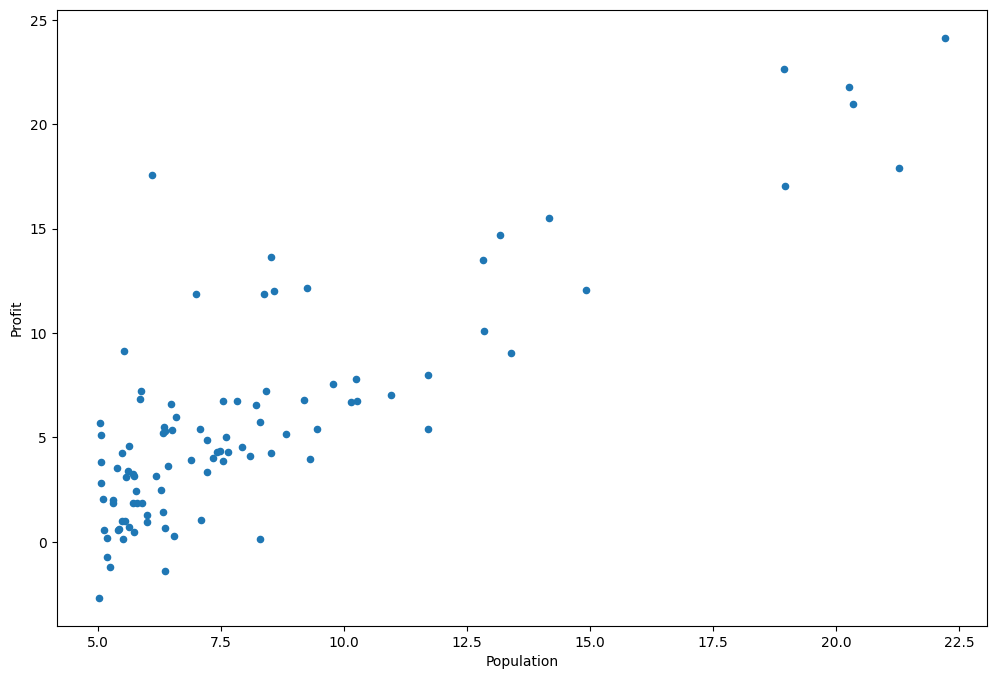

In [ ]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))


**Implementing Simple Linear Regression**

In [ ]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [ ]:
# append a ones column to the front of the data set
data.insert(0, 'Ones', 1)

In [ ]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [ ]:
# convert from data frames to numpy matrices
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [ ]:
X.shape, theta.shape, y.shape


((97, 2), (1, 2), (97, 1))

In [ ]:
computeCost(X, y, theta)

32.072733877455676

In [ ]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost

In [ ]:
# initialize variables for learning rate and iterations
alpha = 0.01
iters = 1000

# perform gradient descent to "fit" the model parameters
g, cost = gradientDescent(X, y, theta, alpha, iters)

In [ ]:
g

matrix([[-3.24140214,  1.1272942 ]])

In [ ]:
computeCost(X, y, g)

4.515955503078914

**Viewing The Results**

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

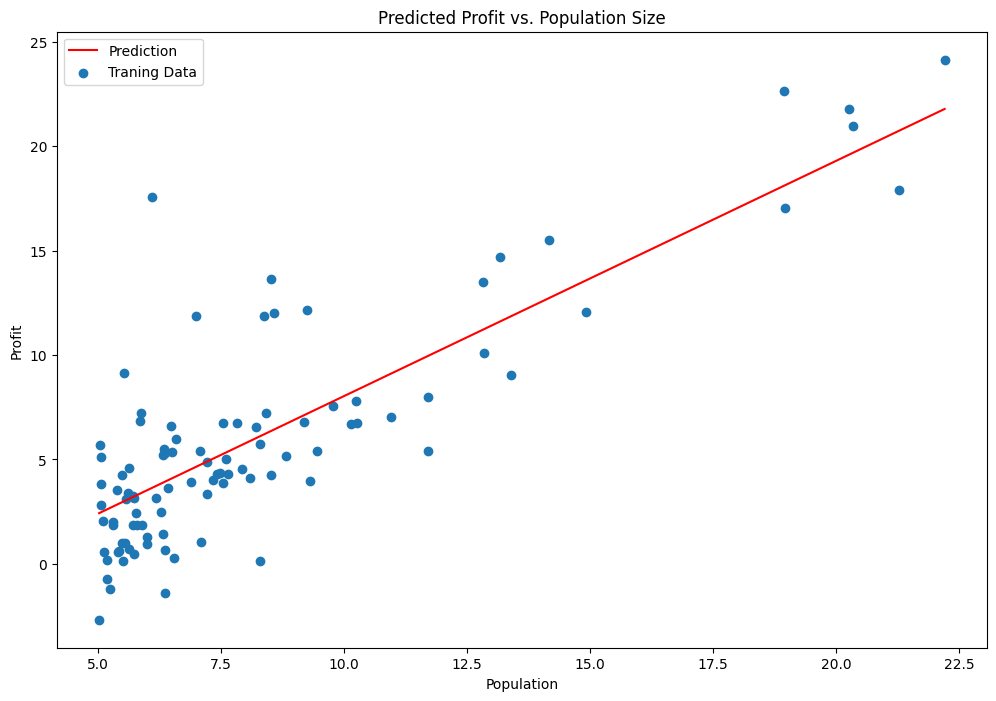

In [ ]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Text(0.5, 1.0, 'Error vs. Training Epoch')

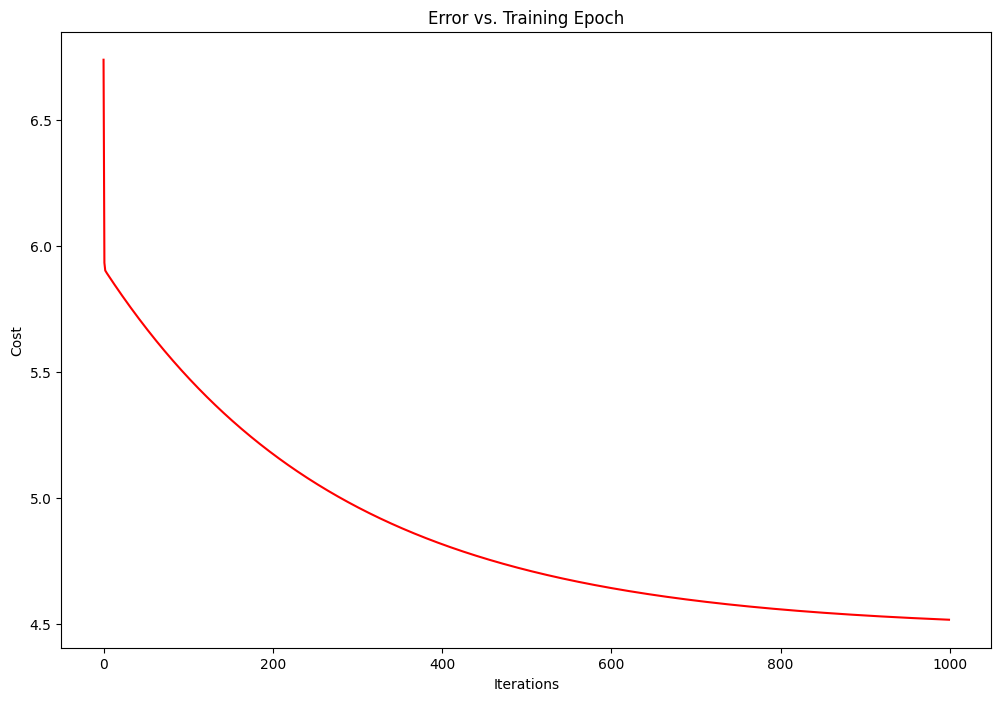

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

# **Chapter: 3-Multivariate Linear Regression**

**Import libraries**

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Load Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

data2 = pd.read_csv('/content/drive/MyDrive/Courses /Data Science /Machine Learning/Theory /ML andrew/Dataset/ex1data2.txt', header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


**Feature normalization**

In [ ]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


**Model Training**

Gradient descent function

In [ ]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost

In [ ]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

Parameter initializations

In [ ]:
# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))


In [ ]:
alpha = 0.01
iters = 1000

In [ ]:
# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

In [ ]:
# get the cost (error) of the model
computeCost(X2, y2, g2)

0.13070336960771892

**Plot the training progress**

Text(0.5, 1.0, 'Error vs. Training Epoch')

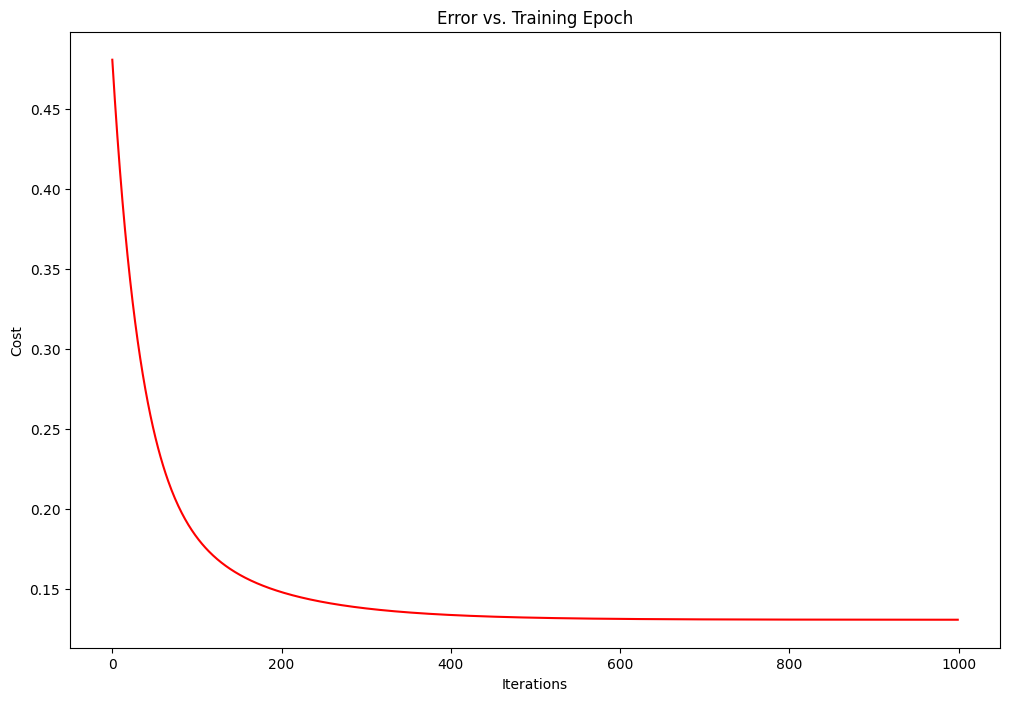

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

**Normal Equation**

In [ ]:
import numpy as np
def normal_equation(X, y):
 theta = np.linalg.inv(X.T @ X) @ X.T @ y
 return theta
# Example usage:
X = np.array([[1, 2], [1, 3], [1, 4]]) # Features
y = np.array([2, 5, 7]) # Target values
theta = normal_equation(X, y)
print("Optimal parameters:", theta)

Optimal parameters: [-2.83333333  2.5       ]


# **Chapter 4: Logistic Regression**

## **4.1-Logistic Regression with sample Example**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Generate a small dataset for illustration
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = (4 + 3 * X + np.random.randn(100, 1) > 5).astype(int)

# Add a bias term to the feature matrix
X_b = np.c_[np.ones((100, 1)), X]

In [ ]:
# Sigmoid (logistic) function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
# Cost function for logistic regression
def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = -1/m * (y.T.dot(np.log(h)) + (1 - y).T.dot(np.log(1 - h)))
    return cost.item()

In [ ]:
# Gradient descent to update parameters
def gradient_descent(theta, X, y, learning_rate, n_iterations):
    m = len(y)
    costs = []

    for iteration in range(n_iterations):
        h = sigmoid(X.dot(theta))
        gradient = 1/m * X.T.dot(h - y)
        theta -= learning_rate * gradient
        cost = cost_function(theta, X, y)
        costs.append(cost)

    return theta, costs

In [ ]:
# Initialize parameters
theta_initial = np.random.randn(2, 1)


In [ ]:
# Set hyperparameters
learning_rate = 0.01
n_iterations = 1000

In [ ]:
# Run gradient descent
theta_final, costs = gradient_descent(theta_initial, X_b, y, learning_rate, n_iterations)

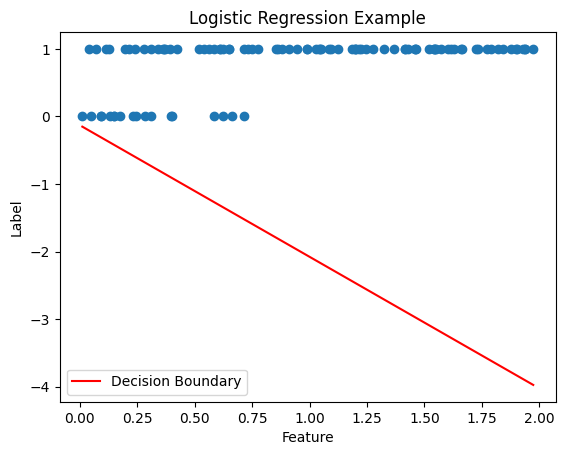

In [ ]:
# Plot the data points and decision boundary
plt.scatter(X, y)
plt.xlabel("Feature")
plt.ylabel("Label")
plt.title("Logistic Regression Example")
x_values = np.array([np.min(X), np.max(X)])
#y_values = -(theta_final[0] + theta_final[1] * x_values) / theta_final[2]
y_values = -(theta_final[0] + theta_final[1] * x_values)

plt.plot(x_values, y_values, label="Decision Boundary", color='red')
plt.legend()
plt.show()

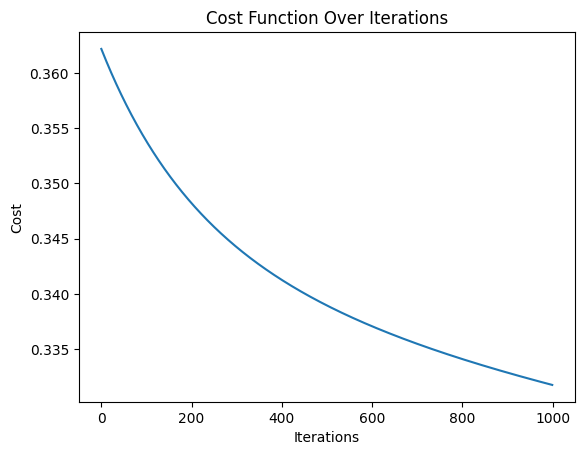

In [ ]:
# Plot the cost over iterations
plt.plot(range(n_iterations), costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Over Iterations")
plt.show()

## **4.2-Logistic Regression**

You may be wondering – why are we using a “regression” algorithm on a classification problem? Although the name seems to indicate otherwise, logistic regression is actually a classification algorithm. I suspect it’s named as such because it’s very similar to linear regression in its learning approach, but the cost and gradient functions are formulated differently. In particular, logistic regression uses a sigmoid or “logit” activation function instead of the continuous output in linear regression (hence the name). We’ll see more later on when we dive into the implementation.

To get started, let’s import and examine the data set we’ll be working with.

**Load dataseet**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import libraries**

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**Load dataseet**

In [5]:
#path = os.getcwd() + '/content/drive/MyDrive/Courses /Data Science /Machine Learning/Theory /ML andrew/Dataset/ex1data1.txt'
data = pd.read_csv('/content/drive/MyDrive/Courses /Data Science /Machine Learning/Theory /ML andrew/Dataset/ex2data1.txt', header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


There are two continuous independent variables in the data - “Exam 1” and “Exam 2”. Our prediction target is the “Admitted” label, which is binary-valued. A value of 1 means the student was admitted and a value of 0 means the student was not admitted. Let’s see this graphically with a scatter plot of the two scores and use color coding to visualize if the example is positive or negative.

Text(0, 0.5, 'Exam 2 Score')

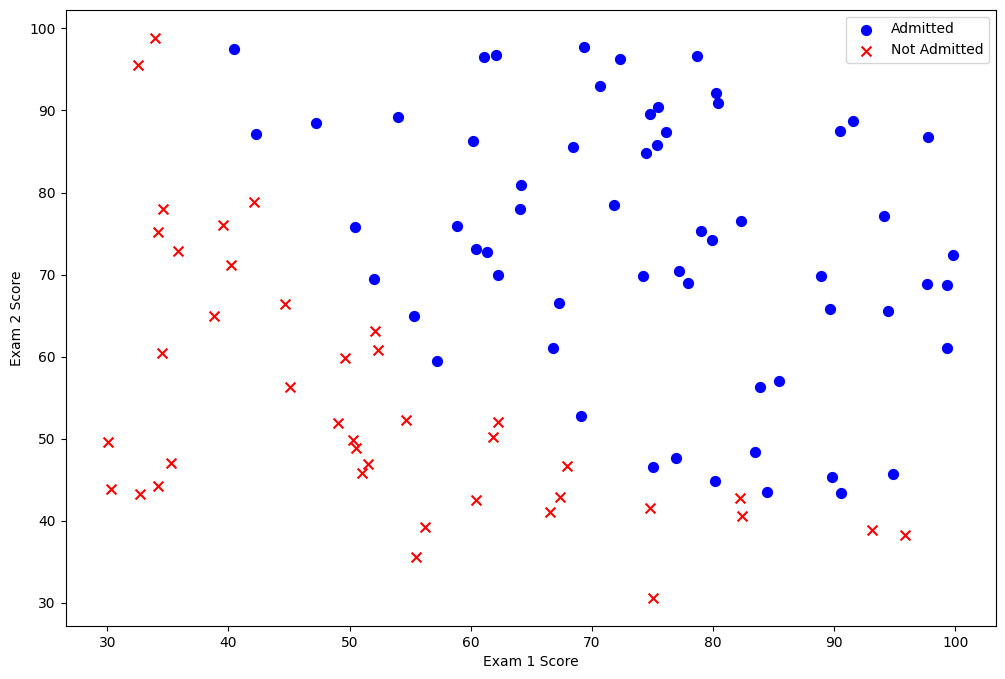

In [6]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

From this plot we can see that there’s a nearly linear decision boundary. It curves a bit so we can’t classify all of the examples correctly using a straight line, but we should be able to get pretty close. Now we need to implement logistic regression so we can train a model to find the optimal decision boundary and make class predictions. The first step is to implement the sigmoid function.

def sigmoid(z):

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

This function is the “activation” function for the output of logistic regression. It converts a continuous input into a value between zero and one. This value can be interpreted as the class probability, or the likelihood that the input example should be classified positively. Using this probability along with a threshold value, we can obtain a discrete label prediction. It helps to visualize the function’s output to see what it’s really doing.

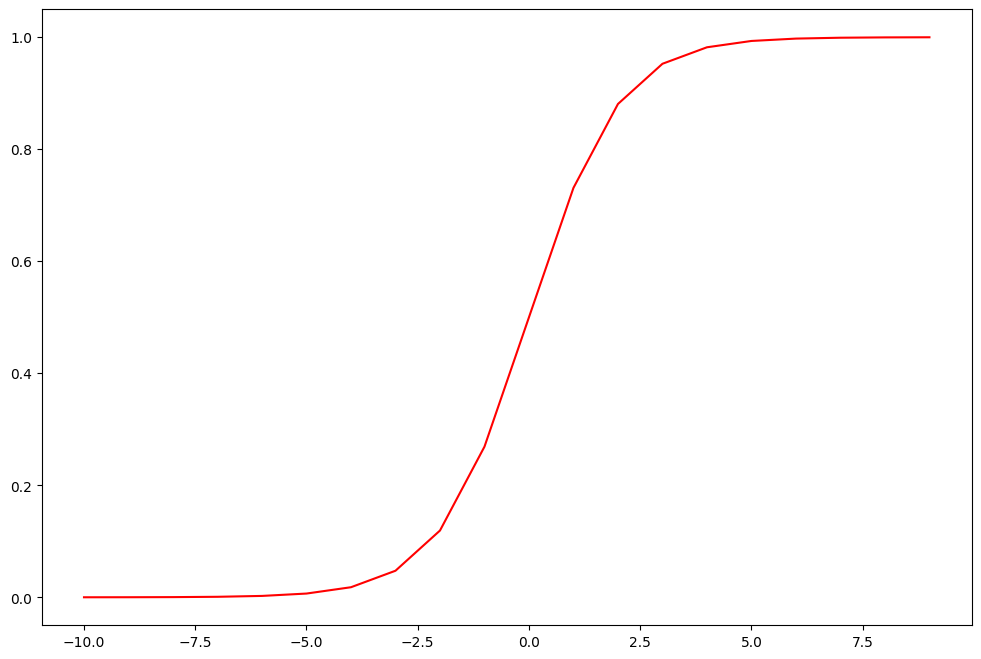

In [8]:
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), 'r')

**Cost Function**

Our next step is to write the cost function. Remember that the cost function evaluates the performance of the model on the training data given a set of model parameters. Here’s the cost function for logistic regression.

In [9]:
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

Note that we reduce the output down to a single scalar value, which is the sum of the “error” quantified as a function of the difference between the class probability assigned by the model and the true label of the example. The implementation is completely vectorized – it’s computing the model’s predictions for the whole data set in one statement (sigmoid(X * theta.T)). If the math here isn’t making sense, refer to the exercise text I linked to above for a more detailed explanation.

We can test the cost function to make sure it’s working, but first we need to do some setup.

In [10]:
# add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1)


In [11]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [12]:
# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

I like to check the shape of the data structures I’m working with fairly often to convince myself that their values are sensible. This technique if very useful when implementing matrix multiplication.

In [13]:
X.shape, theta.shape, y.shape


((100, 3), (3,), (100, 1))

Now let’s compute the cost for our initial solution given zeros for the model parameters, here represented as “theta”.

In [14]:
cost(theta, X, y)


0.6931471805599453

Now that we have a working cost function, the next step is to write a function that computes the gradient of the model parameters to figure out how to change the parameters to improve the outcome of the model on the training data. Recall that with gradient descent we don’t just randomly jigger around the parameter values and see what works best. At each training iteration we update the parameters in a way that’s guaranteed to move them in a direction that reduces the training error (i.e. the “cost”). We can do this because the cost function is differentiable. The calculus involved in deriving the equation is well beyond the scope of this blog post, but the full equation is in the exercise text. Here’s the function.

In [15]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)

    return grad

Note that we don't actually perform gradient descent in this function - we just compute a single gradient step. In the exercise, an Octave function called "fminunc" is used to optimize the parameters given functions to compute the cost and the gradients. Since we're using Python, we can use SciPy's optimization API to do the same thing.

In [16]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
cost(result[0], X, y)

0.20349770158947447

We now have the optimal model parameters for our data set. Next we need to write a function that will output predictions for a dataset X using our learned parameters theta. We can then use this function to score the training accuracy of our classifier.

In [18]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print('accuracy = {0}%'.format(accuracy))

accuracy = 89%


Our logistic regression classifer correctly predicted if a student was admitted or not 89% of the time. Not bad! Keep in mind that this is training set accuracy though. We didn't keep a hold-out set or use cross-validation to get a true approximation of the accuracy so this number is likely higher than its true performance (this topic is covered in a later exercise).

# **References**
[1-Machine Learning Exercises In Python, Part 1](https://www.johnwittenauer.net/machine-learning-exercises-in-python-part-1/)